# Bee Reproduction

### The following analysis was excerpted from the Data Camp course "Statistical Thinking in Python"

# 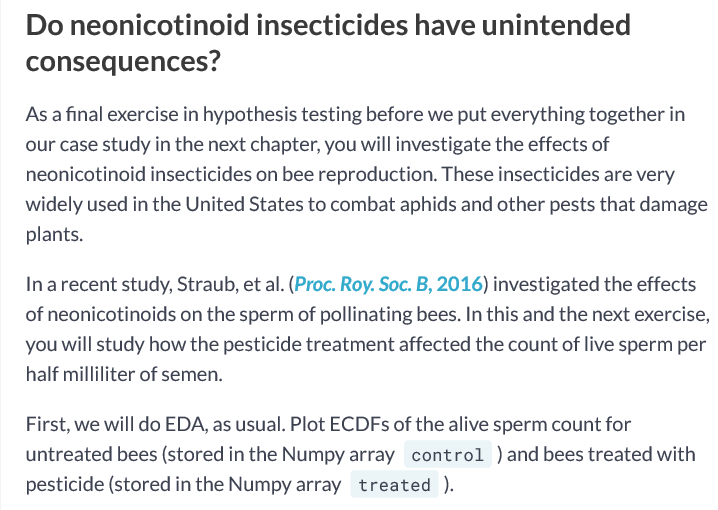

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
control = np.array([ 4.159234,  4.408002,  0.172812,  3.498278,  3.104912,  5.164174,
        6.615262,  4.633066,  0.170408,  2.65    ,  0.0875  ,  1.997148,
        6.92668 ,  4.574932,  3.896466,  5.209814,  3.70625 ,  0.      ,
        4.62545 ,  3.01444 ,  0.732652,  0.4     ,  6.518382,  5.225   ,
        6.218742,  6.840358,  1.211308,  0.368252,  3.59937 ,  4.212158,
        6.052364,  2.115532,  6.60413 ,  5.26074 ,  6.05695 ,  6.481172,
        3.171522,  3.057228,  0.218808,  5.215112,  4.465168,  2.28909 ,
        3.732572,  2.17087 ,  1.834326,  6.074862,  5.841978,  8.524892,
        4.698492,  2.965624,  2.324206,  3.409412,  4.830726,  0.1     ,
        0.      ,  4.101432,  3.478162,  1.009688,  4.999296,  4.32196 ,
        0.299592,  3.606032,  7.54026 ,  4.284024,  0.057494,  6.036668,
        2.924084,  4.150144,  1.256926,  4.666502,  4.806594,  2.52478 ,
        2.027654,  2.52283 ,  4.735598,  2.033236,  0.      ,  6.177294,
        2.601834,  3.544408,  3.6045  ,  5.520346,  4.80698 ,  3.002478,
        3.559816,  7.075844, 10.      ,  0.139772,  6.17171 ,  3.201232,
        8.459546,  0.17857 ,  7.088276,  5.496662,  5.415086,  1.932282,
        3.02838 ,  7.47996 ,  1.86259 ,  7.838498,  2.242718,  3.292958,
        6.363644,  4.386898,  8.47533 ,  4.156304,  1.463956,  4.533628,
        5.573922,  1.29454 ,  7.547504,  3.92466 ,  5.820258,  4.118522,
        4.125   ,  2.286698,  0.591882,  1.273124,  0.      ,  0.      ,
        0.      , 12.22502 ,  7.601604,  5.56798 ,  1.679914,  8.77096 ,
        5.823942,  0.258374,  0.      ,  5.899236,  5.486354,  2.053148,
        3.25541 ,  2.72564 ,  3.364066,  2.43427 ,  5.282548,  3.963666,
        0.24851 ,  0.347916,  4.046862,  5.461436,  4.066104,  0.      ,
        0.065   ])

In [22]:
treated = np.array([1.342686, 1.058476, 3.793784, 0.40428 , 4.528388, 2.142966,
       3.937742, 0.1375  , 6.919164, 0.      , 3.597812, 5.196538,
       2.78955 , 2.3229  , 1.090636, 5.323916, 1.021618, 0.931836,
       2.78    , 0.412202, 1.180934, 2.8674  , 0.      , 0.064354,
       3.008348, 0.876634, 0.      , 4.971712, 7.280658, 4.79732 ,
       2.084956, 3.251514, 1.9405  , 1.566192, 0.58894 , 5.219658,
       0.977976, 3.124584, 1.297564, 1.433328, 4.24337 , 0.880964,
       2.376566, 3.763658, 1.918426, 3.74    , 3.841726, 4.69964 ,
       4.386876, 0.      , 1.127432, 1.845452, 0.690314, 4.185602,
       2.284732, 7.237594, 2.185148, 2.799124, 3.43218 , 0.63354 ,
       1.142496, 0.586   , 2.372858, 1.80032 , 3.329306, 4.028804,
       3.474156, 7.508752, 2.032824, 1.336556, 1.906496, 1.396046,
       2.488104, 4.759114, 1.07853 , 3.19927 , 3.814252, 4.275962,
       2.817056, 0.552198, 3.27194 , 5.11525 , 2.064628, 0.      ,
       3.34101 , 6.177322, 0.      , 3.66415 , 2.352582, 1.531696])

In [18]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

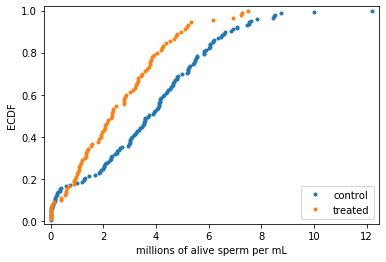

In [23]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()


# 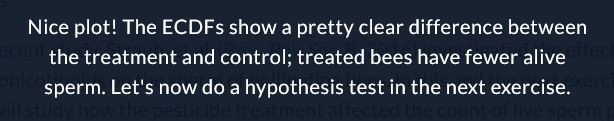

# 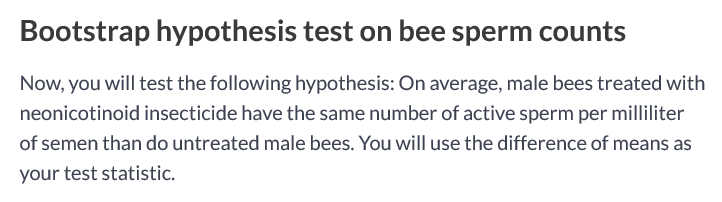

In [25]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [26]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(shape=size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [28]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)


p-value = 0.0001


# 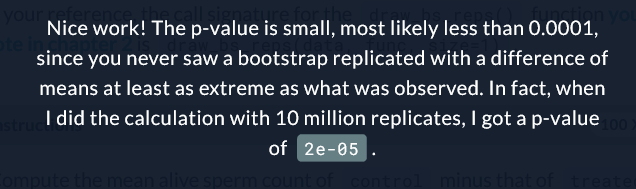